# 911 Calls

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(rc={'figure.figsize' : (16,9)} , font_scale=1.5 , style='whitegrid')
sns.set_palette('viridis')

In [3]:
import cufflinks as cf
cf.set_config_file(offline=True , sharing='public',theme='pearl')

# data

In [4]:
df = pd.read_csv('911.csv')
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD END  1  
1  BRIAR PATH & WHITEMARSH LN  1  
2                    HAWS AVE  1  
3          AIRY ST & SWEDE ST  1  
4    CHERRYWOOD CT & DEAD END  1

# information sur tableau  données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# top 5 code postal basé sur le nombre d'appels

In [6]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

# top 5 villes (twp) basé sur le nombre d'appels

In [7]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

# manipulation de données

#### création de nouvelles colonnes appelées "Reason"

In [8]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title            timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY  2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY  2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK  2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY  2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS  2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  
0      REINDEER CT & DEAD END  1    EMS  
1  BRIAR PATH & WHITEMARSH LN  1    EMS  
2                    HAWS AVE  1   Fire  
3          AIRY ST & SWEDE ST  1    EMS  
4    CHERRYWOOD CT & DEAD END  1    EMS

#### EMS ( Services médicaux d'urgence ) ,Fire( flamme ) 

In [9]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

# nous ajoutons 3 nouvelles colonnes basées sur la colonne de date originale

In [10]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
df['Hour'] = df['timeStamp'].apply(lambda x : x.hour)
df['Month'] = df['timeStamp'].apply(lambda x : x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x : x.dayofweek)

In [12]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month  Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12            3  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12            3  
2                    HAWS AVE  1   Fire    17     12            3  
3          AIRY ST & SWEDE ST  1    EMS    17     12            3  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12            3

In [13]:
dmap = { 0:'Lundi' , 1:'Mardi' , 2:'Mercredi' , 3:'Jeudi' , 4:'Vendredi' , 5:'Samedi' , 6:'Dimanche'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [14]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day of Week  
0      REINDEER CT & DEAD END  1    EMS    17     12       Jeudi  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12       Jeudi  
2                    HAWS AVE  1   Fire    17     12       Jeudi  
3          AIRY ST & SWEDE ST  1    EMS    17     12       Jeudi  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12       Jeudi

# créer la matrice, le groupe de colonnes "Reason" et "Day of Week" et compter combien d'appels par jour et à quelle catégorie il appartient

In [15]:
df.groupby(['Reason','Day of Week']).count()['twp'].unstack()

Day of Week  Dimanche  Jeudi  Lundi  Mardi  Mercredi  Samedi  Vendredi
Reason                                                                
EMS              6451   6992   7237   7219      6961    6680      7313
Fire             2075   2133   2201   2117      2223    2067      2087
Traffic          3604   5349   5236   5807      5684    4583      5430

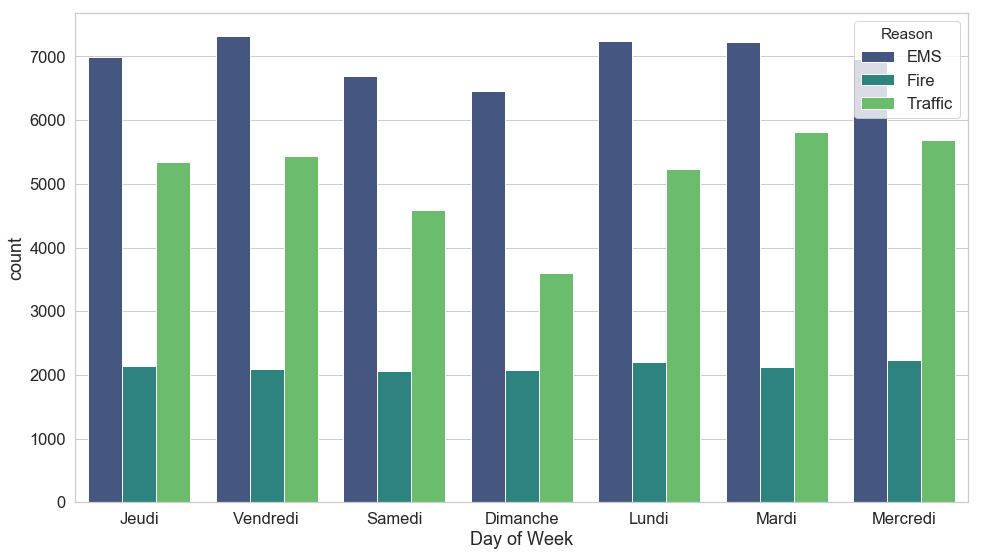

In [16]:
sns.countplot(data=df , x='Day of Week' , hue='Reason' , palette='viridis' )

# nous groupons les colonnes raison et mois et nous comptons le nombre d'appels au cours de chaque mois et pour chaque catégorie

In [17]:
df.groupby(['Reason','Month']).count()['twp'].unstack()

Month      1     2     3     4     5     6     7     8     12
Reason                                                       
EMS      6061  5412  5825  5678  5731  5716  6028  4506  3896
Fire     1905  1868  1589  1716  1573  1792  1898  1470  1092
Traffic  5237  4185  3678  3929  4116  4269  4207  3097  2975

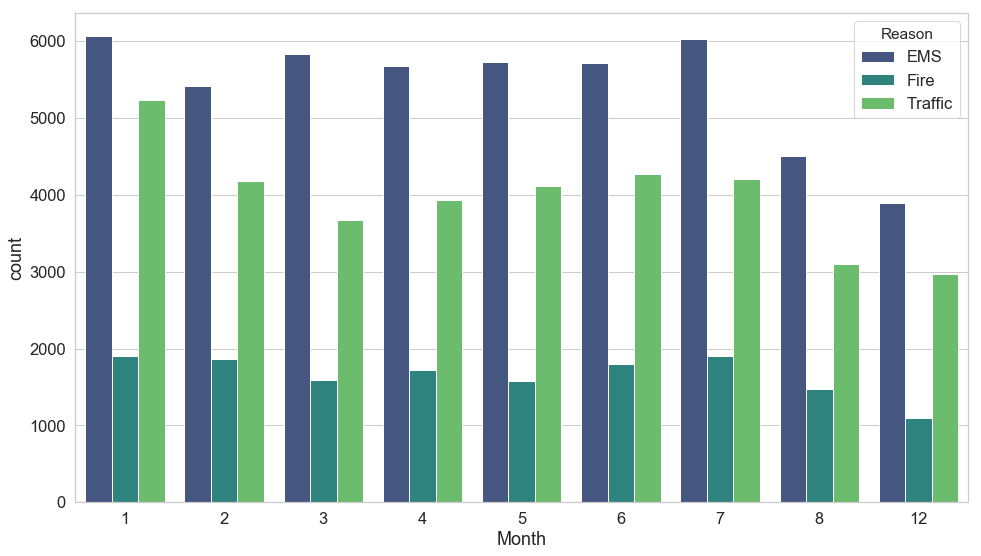

In [18]:
sns.countplot(data=df , x='Month' , hue='Reason' , palette='viridis')

### nous remarquons qu'il y a un mois manquant dans la date, a l'aide  de régression linéaire en peu  avoir une bonne idée du nombre d'appels reçus au cours de ces mois manquants .

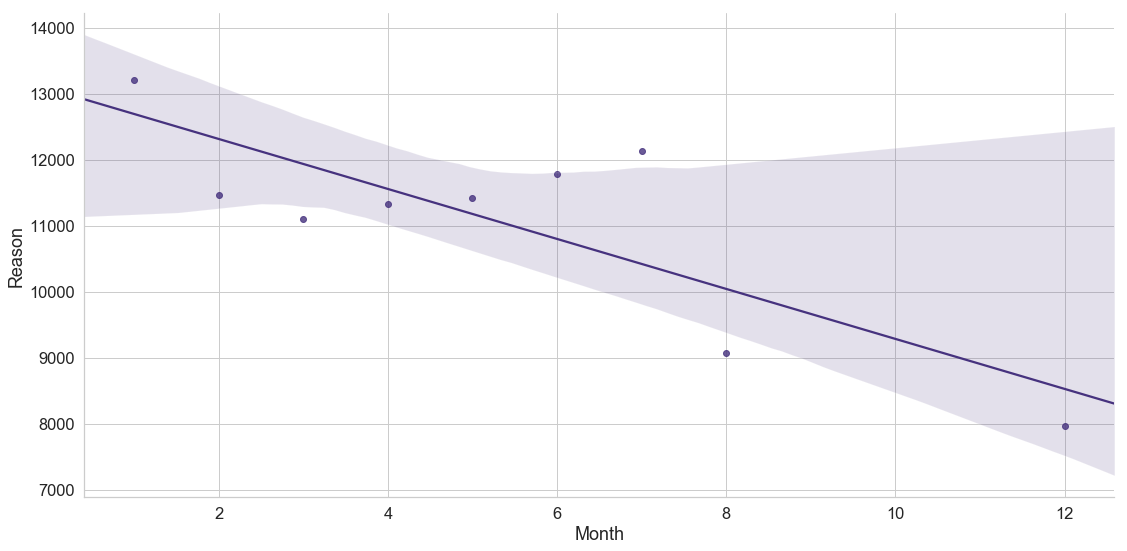

In [19]:
bym = df.groupby('Month').count()['Reason']
sns.lmplot(data=bym.reset_index() , x='Month' , y='Reason',height=8 , aspect=2 )

In [20]:
df['Date'] = df['timeStamp'].apply(lambda x : x.date())

In [21]:
df.head()

lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:40:00        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:40:00  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 17:40:00         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 17:40:01         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 17:40:01   LOWER POTTSGROVE   

                         addr  e Reason  Hour  Month Day of Week        Date  
0      REINDEER CT & DEAD END  1    EMS    17     12       Jeudi  2015-12-10  
1  BRIAR PATH & WHITEMARSH LN  1    EMS    17     12       Jeudi  2015-12-10  
2                    HAWS AVE  1   Fire    17     12       Jeudi  2015-12-10  
3          AIRY ST & SWEDE ST  1    EMS    17     12       Jeudi  2015-12-10  
4    CHERRYWOOD CT & DEAD END  1    EMS    17     12       Jeudi  2015-12-10

## le nombre d’appels par date

In [22]:
df.groupby('Date').count()['Reason'].iplot(color='blue')

## le nombre d’appels pour chaque "Reason" (EMS , Fire , Traffic) en fonction de la date 

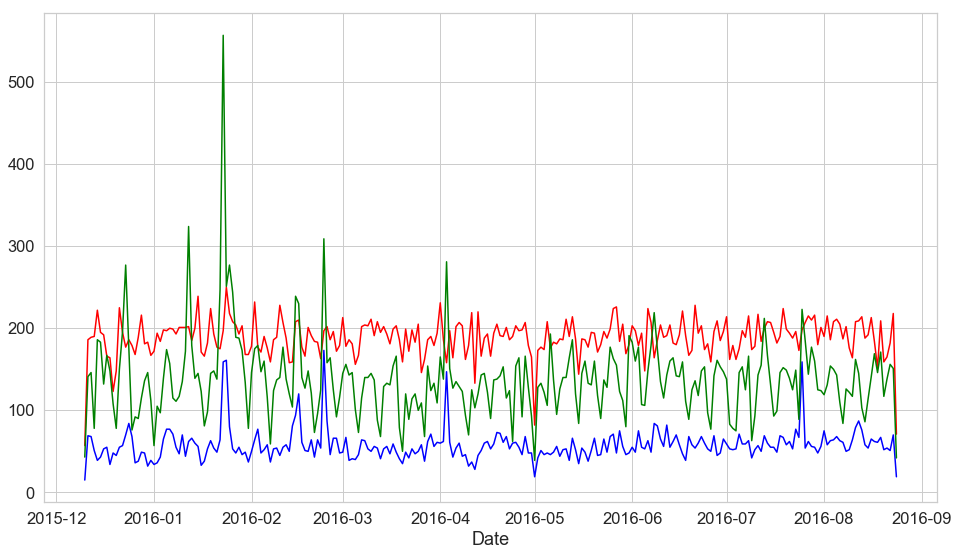

In [23]:
df[df['Reason'] == 'EMS'].groupby('Date').count()['Reason'].plot(c='red')
df[df['Reason'] == 'Fire'].groupby('Date').count()['Reason'].plot(c='blue')
df[df['Reason'] == 'Traffic'].groupby('Date').count()['Reason'].plot(c='green')

#### graph interactive

In [24]:
ems = df[df['Reason'] == 'EMS'].groupby('Date').count()['Reason']
fire = df[df['Reason'] == 'Fire'].groupby('Date').count()['Reason']
trafic = df[df['Reason'] == 'Traffic'].groupby('Date').count()['Reason']

In [25]:
reason = pd.concat([ems , fire , trafic] , axis=1)
reason.columns = ['ems' , 'fire' , 'trafic']
reason.head()

ems  fire  trafic
Date                         
2015-12-10   57    15      43
2015-12-11  186    69     141
2015-12-12  189    68     146
2015-12-13  190    51      78
2015-12-14  222    39     186

In [26]:
reason.iplot(colorscale='Set1')

# nous groupons les colonnes Jour et Heure et nous comptons le nombre d'appels au cours de chaque Heur et pour chaque jour

In [27]:
byd = df.groupby(['Day of Week' , 'Hour']).count()['Reason'].unstack()

In [28]:
byd.head()

Hour          0    1    2    3    4    5    6    7    8    9  ...    14   15  \
Day of Week                                                   ...              
Dimanche     383  306  286  268  242  240  300  402  483  620 ...   684  691   
Jeudi        278  202  233  159  182  203  362  570  777  828 ...   876  969   
Lundi        282  221  201  194  204  267  397  653  819  786 ...   869  913   
Mardi        269  240  186  170  209  239  415  655  889  880 ...   943  938   
Mercredi     250  216  189  209  156  255  410  701  875  808 ...   904  867   

Hour           16    17   18   19   20   21   22   23  
Day of Week                                            
Dimanche      663   714  670  655  537  461  415  330  
Jeudi         935  1013  810  698  617  553  424  354  
Lundi         989   997  885  746  613  497  472  325  
Mardi        1026  1019  905  731  647  571  462  274  
Mercredi      990  1037  894  686  668  575  490  335  

[5 rows x 24 columns]

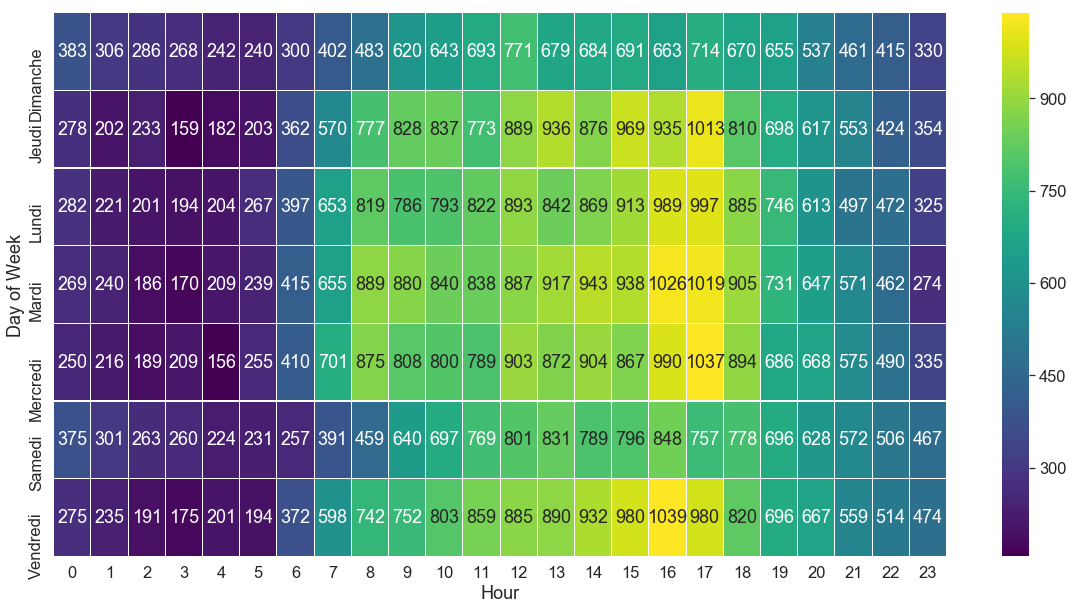

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(byd , cmap='viridis' , annot=True , fmt='g' ,linewidths=0.2)

# le meme chose avec les mois et les jours

In [37]:
bym = df.groupby(['Day of Week' , 'Month']).count()['Reason'].unstack()

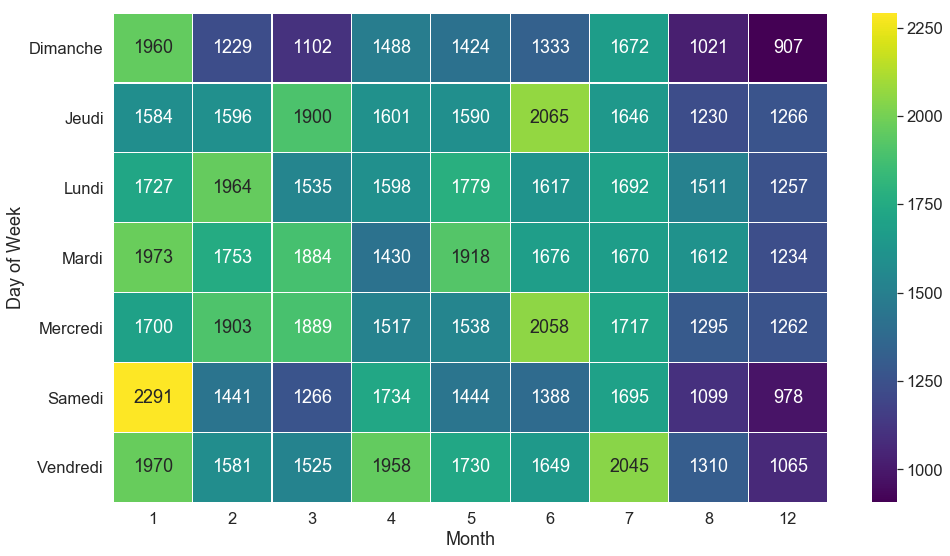

In [38]:
sns.heatmap(bym , cmap='viridis', annot=True , fmt='g' ,linewidths=0.2)